&nbsp;

# 1. Basic Exploration
Data exploration is a crucial step to understanding the underlying patterns and relationships inside your dataset. The most effective way to improving your output is not by tuning hyperparameters or trying out more complex models, it is in fact improving the quality of your data. Some tehcniques used to improve the quality of your dataset include: building new features, removing outliers and handling missing data. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Import functions. 
import plot_functions

# Splitting the dataset. 
from sklearn.model_selection import train_test_split

# Import transformers.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Render on github. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() 
df = pd.read_csv(r"{}\auto-mpg.csv".format(root))
df = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'mpg']] # Placing labels at index position [-1]. 
df.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,15.0


&nbsp;

### Section A: Data Exploration
In this section we'll be focusing on analysing our dataset and trying to locate any interesting insights: including any missing values or outliers that we should be aware of. 

**A.1: Setting Aside a Validation Set**<br> In this section we'll randomly shuffle our entire dataset and set aside a validation set to test our finalised model on at the end of the project.

In [3]:
# Splitting the data into features and label. 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Creating train and test splits, with a validation size % of 0.2.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
testData = pd.concat([X_test, y_test], axis=1) # Appending the test labels and features together to set aside as the holdout set. 
trainData = pd.concat([X_train, y_train], axis=1) # Creating the dataset we'll train our model on. 

testData.to_csv(r"{}\test.csv".format(root), index=False) # Exporting the test set to set aside for later. 
trainData.to_csv(r"{}\train.csv".format(root), index=False) # Exporting the train set to use as our main dataset. 
testData.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
391,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2,36.0
386,6,181.0,110.0,2945,16.4,82,1,buick century limited,25.0


**A.2: Statistical Insights**<br> The next step is to gain insight on our data and learn about its underlying structure, this could be useful in understanding the correlation our features have against the label.

In [4]:
trainData.info() # General structure of the data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 341 to 331
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    int64  
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car name      318 non-null    object 
 8   mpg           318 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 24.8+ KB


* We have a total of 9 features, with 318 rows, with a  mixture of datatypes ranging from floats, ints and objects.
* The only feature to have missing values is "horsepower" which has a total of 6.

In [5]:
trainData.describe() # Statistical summary. 

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
count,318.000000,318.000000,312.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.427673,190.866352,103.541667,2943.886792,15.693711,75.930818,1.575472,23.597170
std,1.696012,103.673376,39.015763,846.229742,2.808014,3.671219,0.793683,7.856795
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,98.000000,75.000000,2204.000000,14.000000,73.000000,1.000000,17.500000
50%,4.000000,145.500000,91.500000,2789.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,261.500000,125.000000,3533.750000,17.375000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


&nbsp;

### Section B: Distribution
Now it's time to check out the distribution of each numerical feature.

**B.1: Imputing our Data**<br> Before we can look at the distribution of our numerical features, we must impute our missing values so it doesn't interefere with our analysis.

In [6]:
numerical = list(df.select_dtypes(exclude=['object']).columns)
print(f'Numerical columns are: {numerical}')

Numerical columns are: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'mpg']


In [7]:
si = SimpleImputer(strategy="mean") # Setting up our SimpleImputer instance. 
preprocessing = Pipeline(steps=[("s", si)]) # Using a pipeline to avoid data leakage 
data = preprocessing.fit_transform(df[numerical]) # Transforming our data. 
imputedNumerical = pd.DataFrame(data=data, columns=trainData[numerical].columns) # Storing results into a dataframe. 
imputedNumerical.head(2) # Checking if everything loaded correctly. 

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,15.0


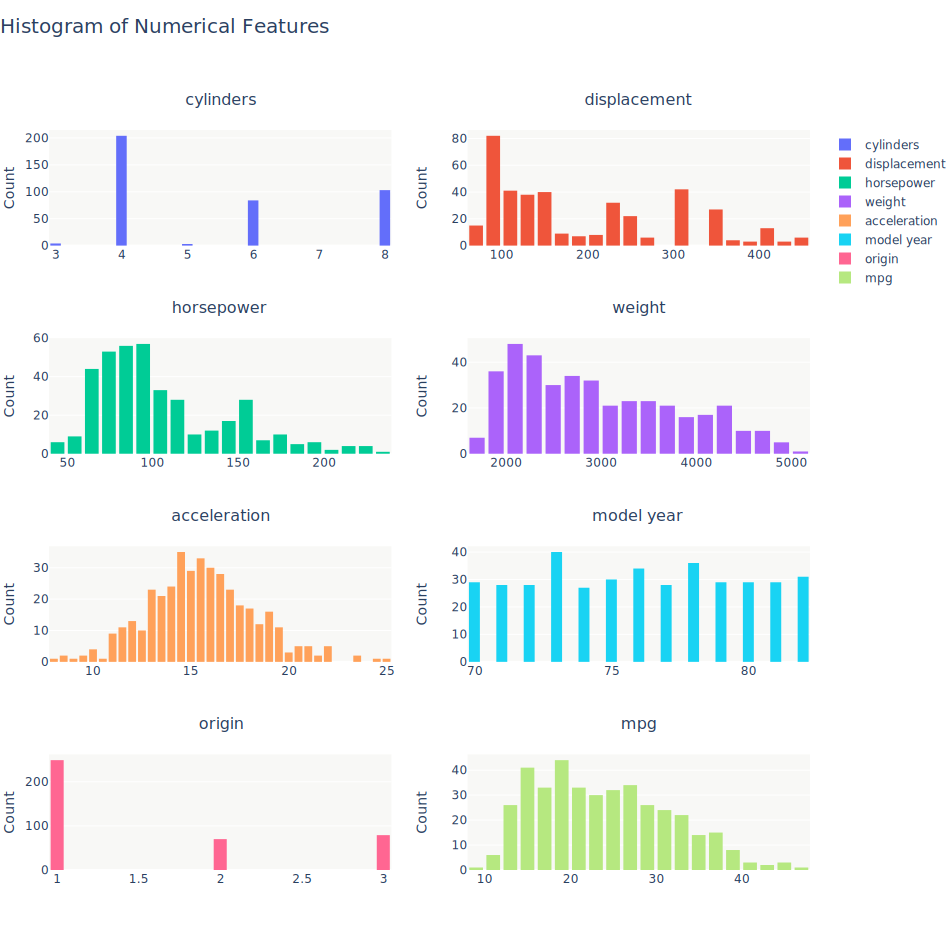

In [8]:
plot_functions.histogram(df=df)

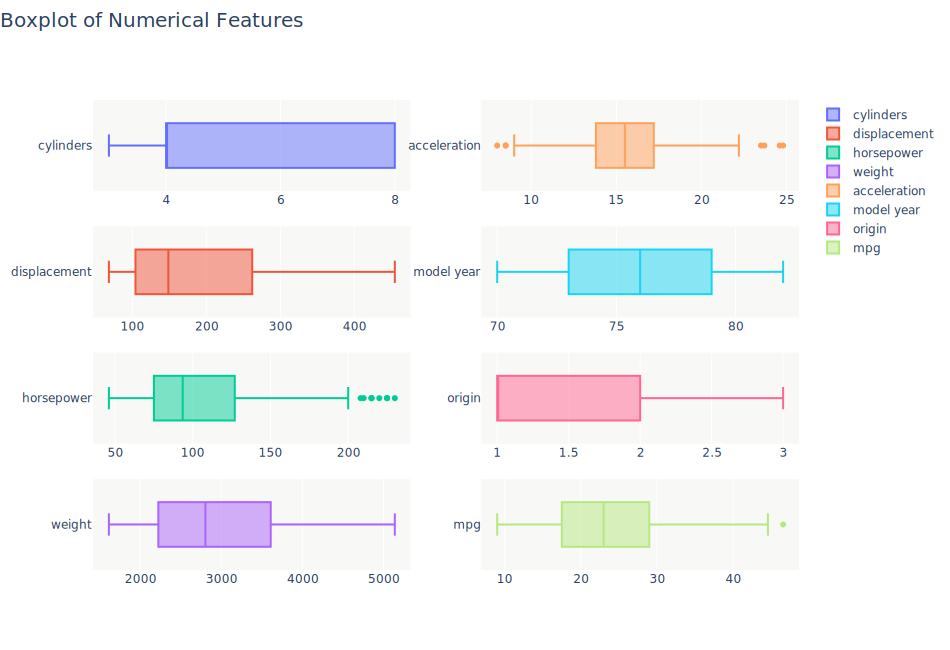

In [9]:
plot_functions.boxplot(df=df)

* Features that have a normal distribution include MPG (label), Weight, Model Year, Acceleration and Horsepower.
* It seems like the rest of the features seem to be skewed. Machine Learning algorithms work best with a Gaussian distribution, so some type of transform that will reduce the skewness can lift performance.
* As for outliers, there seems to be a few points from Horsepower and Acceleration, however they don't seem to be sample error, or effect the correlation in a negative way, so the best course of action is to leave them in.

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  